In [114]:
!pip install opencv-python

In [115]:
import cv2  
import matplotlib.pyplot as plt
import numpy as np


In [116]:
yolo = cv2.dnn.readNet("/content/yolov3-tiny.weights","/content/yolov3-tiny.cfg")

In [117]:
classes = []
with open("/content/coco.names", "r") as a:
  classes= a.read().splitlines()

In [118]:
len(classes)

80

In [119]:
img= cv2.imread("/content/mascarillasboris-kKIE--984x468@Diario Sur.jpeg")
height,width,_=img.shape
blob = cv2.dnn.blobFromImage(img, 1/255, (320,320) ,(0,0,0), swapRB=True,crop =False)

In [120]:
blob.shape

(1, 3, 320, 320)

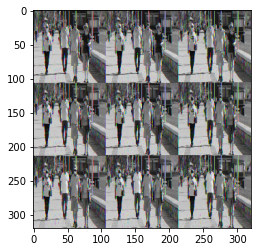

In [121]:
imagen2 = blob[0].reshape(320,320,3)
plt.imshow(imagen2)

In [122]:
yolo.setInput(blob)
output_layes_name=yolo.getUnconnectedOutLayersNames()
layeroutput=yolo.forward(output_layes_name)

In [134]:
boxes= []
confidences = []
class_ids = []

for output in layeroutput:
  for detection in output:
    score = detection[5:]
    class_id = np.argmax(score)
    confidence = score[class_id] 
    if confidence > 0.7:
      center_x = int(detection[0]*width)
      center_y = int(detection[0]*height)
      w = int(detection[0]*width)
      h = int(detection[0]*height)

      x = int(center_x - w/2)
      y= int(center_y - h/2)

      boxes.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id)



TabError: ignored

In [124]:
len(boxes)

3

In [125]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences ,0.5 ,0.4)

In [126]:
font = cv2.FONT_HERSHEY_PLAIN
colors=  np.random.uniform(0,255,size=(len(boxes),3))

In [127]:
for i in indexes.flatten():
  x,y,w,h = boxes[i]
  label = str(classes[class_ids[i]])
  confi=str(round(confidences[i],2 ))
  color=colors[i]

  cv2.rectangle(img, (x,y),(x+w, y+h),color,1)
  cv2.putText(img,label +" "+confi,(x,y+20),font,2,(255,255,255),1)
  

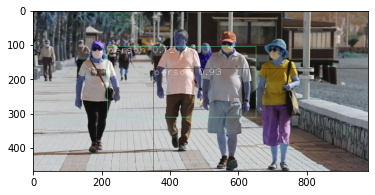

In [128]:
plt.imshow(img)